In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')


In [105]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA 

In [12]:
 df.shape
 df.info()
 df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
 df.describe()
df['age'].mean()
df['charges'].max()

63770.42801

In [29]:
df.value_counts()
 count = df['age'].value_counts()
 sns.countplot(x=count)
df['children'].unique()
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [32]:
df.isna().sum()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Visualizations** 

<Axes: >

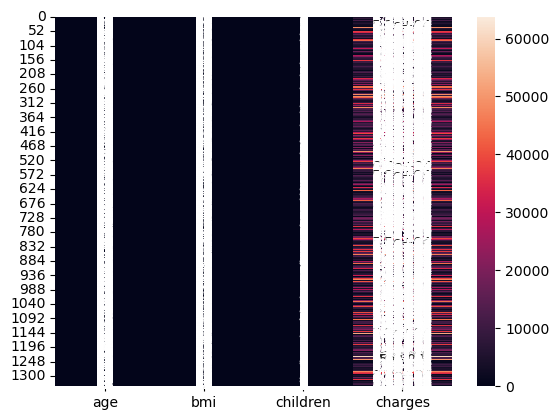

In [49]:

numeric_columns = ['age','bmi','children','charges'] 
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(x=df[col],kde=True)


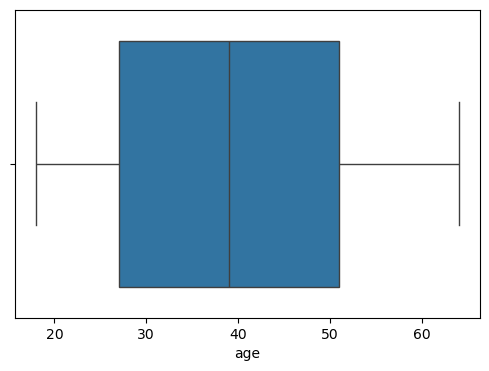

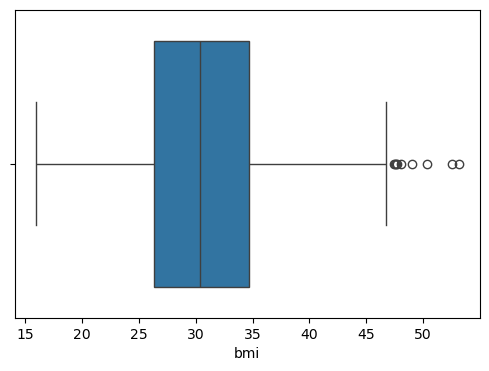

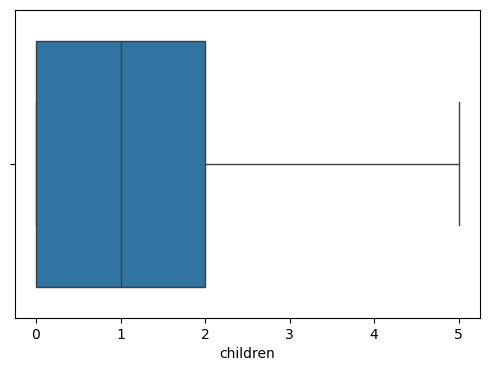

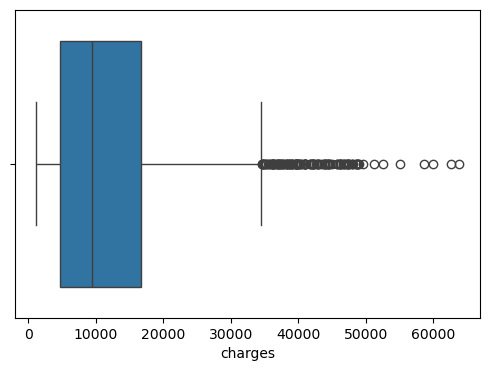

In [58]:
sns.countplot(x=df['children'])
 sns.countplot(x=df['sex'])
 sns.countplot(x=df['region'])

for col in numeric_columns: 
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    


<Axes: >

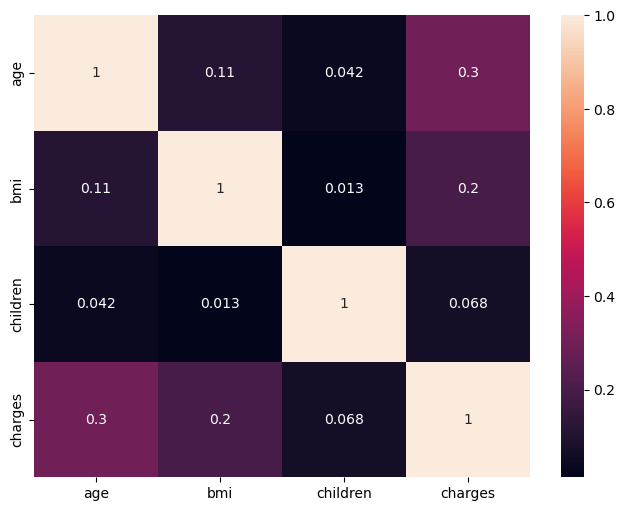

In [52]:
# plt.figure(figsize=(8,6))
# sns.heatmap(data=df.corr(numeric_only=True), annot=True)

# Data Cleaning and Preprocessing

In [131]:
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
#df_cleaned.shape
#df_cleaned.duplicated().sum()
#df_cleaned.drop_duplicates(inplace=True)
#df_cleaned.shape

(1337, 7)

In [74]:
 df_cleaned.isnull().sum()
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [132]:
# Replace male with 0 and female with 1 inside sex column (Perform Label encoding)

df_cleaned['sex'].value_counts()

df_cleaned['sex'] = df_cleaned['sex'].replace({"male":0,"female":1})
df_cleaned.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [133]:
# Replace yes with 1 and no with 0 inside smoker column

df_cleaned['smoker'] = df_cleaned['smoker'].replace({'yes':1,'no':0})
df_cleaned.head(7)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960


In [137]:
# Make bins for region Column to divide into: southwest, southeast, northwest

df_cleaned = pd.get_dummies(data=df_cleaned, columns=['region'], drop_first=True)

columns = ['region_northwest', 'region_southeast', 'region_southwest']
for col in columns: 
   df_cleaned[col] = df_cleaned[col].astype(int) 
    
df_cleaned.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


# Feature Engineering and Extraction

In [155]:
df_cleaned.rename(columns=({'sex':'is_female', 'smoker':'is_smoker'}), inplace=True)

#sns.histplot(x=df_cleaned['bmi'])



In [144]:
# Create bins to make the ranges of bmi on which to decide whether person is underwieght, normal, overweight, or obese 

bmi_bins = [-float('inf'), 18.5, 25, 30, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']

df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)
df_cleaned.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,1,overweight
1,18,0,33.770,1,0,1725.55230,0,1,0,obese
2,28,0,33.000,3,0,4449.46200,0,1,0,obese
3,33,0,22.705,0,0,21984.47061,1,0,0,normal
4,32,0,28.880,0,0,3866.85520,1,0,0,overweight


In [156]:
# Create new columns named as : underwieght_bmi, normal_bmi, overweight_bmi, and obese_bmi 

# df_cleaned = pd.get_dummies(data=df_cleaned, columns=['bmi_category'], drop_first=True)

bmi_columns = ['bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']
for col in bmi_columns: 
    df_cleaned[col] = df_cleaned[col].astype(int)
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0


In [157]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler() 
df_cleaned[['age','bmi','children']] = scaler.fit_transform(df_cleaned[['age','bmi','children']])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.438764,1,-0.453320,-0.908614,1,16884.92400,0,0,1,0,1,0
1,-1.509965,0,0.509621,-0.078767,0,1725.55230,0,1,0,0,0,1
2,-0.797954,0,0.383307,1.580926,0,4449.46200,0,1,0,0,0,1
3,-0.441948,0,-1.305531,-0.908614,0,21984.47061,1,0,0,1,0,0
4,-0.513149,0,-0.292556,-0.908614,0,3866.85520,1,0,0,0,1,0
